In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pycolmap
import matplotlib.pyplot as plt
from matplotlib.image import imread

from megadepth.utils.projections import backward_project, forward_project
from megadepth.utils.utils import camera_pixel_grid, get_camera_poses
from megadepth.utils.read_write_dense import read_array
from megadepth.visualization import create_view_projection_figure,pca

In [3]:
# load images, cameras and depth maps
dense_model_dir = os.path.join("..", "data", "0058")
image_dir = os.path.join(dense_model_dir, "images")
reconstruction = pycolmap.Reconstruction(os.path.join(dense_model_dir, "sparse","sift-NN-ratio-netvlad-50"))

In [13]:
camera_poses = get_camera_poses(reconstruction)

In [5]:
points = np.array([p.xyz for p in reconstruction.points3D.values()])
align = pca(camera_poses)

### Sparse Reconstruction

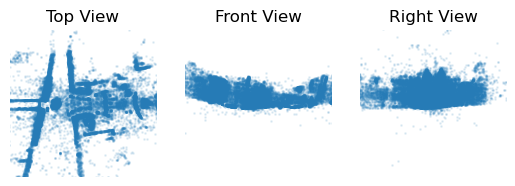

In [6]:
create_view_projection_figure([align(points)], limit=3)

### Camera Poses

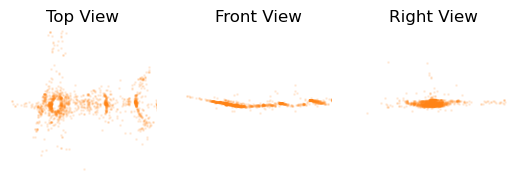

In [12]:
create_view_projection_figure(
    [np.zeros((0,3)), align(camera_poses)], limit=3)

### Camaras and Reconstruction

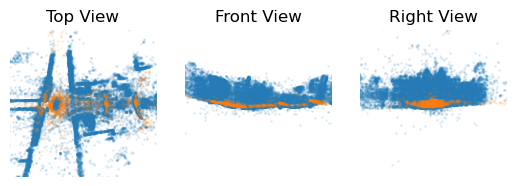

In [10]:
create_view_projection_figure(
    [align(points),align(camera_poses)], limit=3)

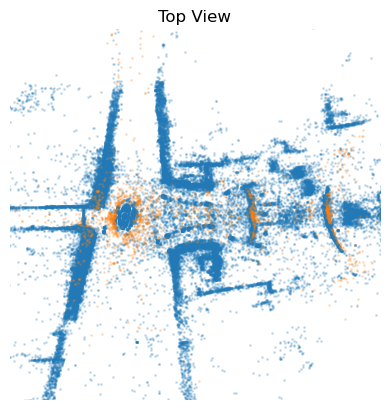

In [16]:
# saving plots
create_view_projection_figure(
    [align(points),align(camera_poses)],
    view=0,limit=3,alpha=0.2,path=r"fig.jpg")
